In [1]:
import implementations as imp
from implementations import ImagePacker
import pandas as pd
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
# from sklearn.model_selection import train_test_split
import copy
%matplotlib inline

In [2]:
cats_train_images = imp.read_images("/Users/sameergururajmathad/Documents/CSC - 481/Final Project/animals/cat",'gray')
dogs_train_images = imp.read_images("/Users/sameergururajmathad/Documents/CSC - 481/Final Project/animals/dog",'gray')

In [3]:
cats_test_images = copy.deepcopy(cats_train_images)
dogs_test_images = copy.deepcopy(dogs_train_images)

In [4]:
train_packed = ImagePacker(data = [cats_train_images, dogs_train_images])
test_packed = ImagePacker(data = [cats_test_images, dogs_test_images])
# 

In [5]:
train_packed == test_packed

False

In [6]:
test_packed.rotate_images()

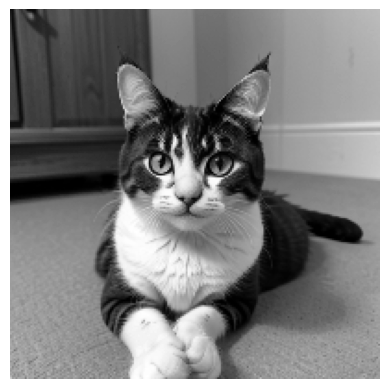

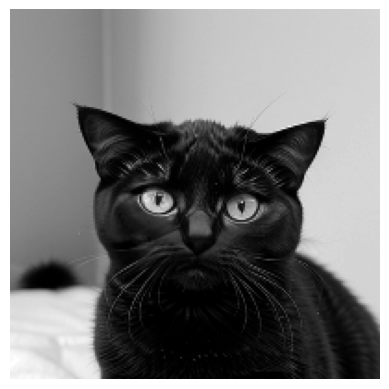

Grayscale - 500 images

In [7]:
train_packed.data[0]

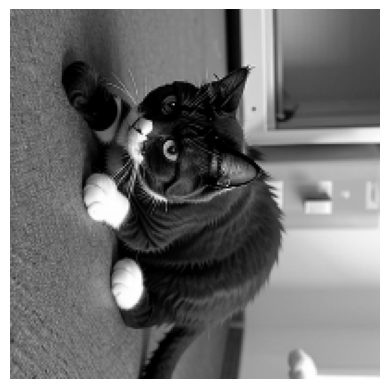

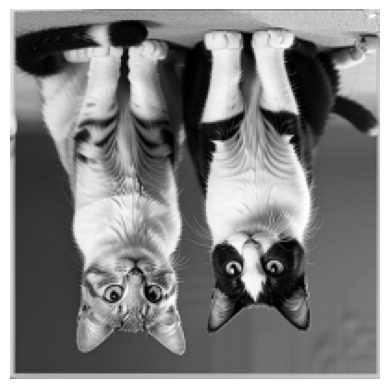

Grayscale - 500 images

In [8]:
test_packed.data[0]


In [9]:
train_sift = train_packed.to_sift(append_label=[1,-1])
test_sift = test_packed.to_sift(append_label=[1,-1])

In [10]:
train_df = train_packed.descriptor_to_df(train_sift)
test_df = test_packed.descriptor_to_df(test_sift)

In [11]:
train_df

,0,1,2,3,4,5,6,7,8,9,...,992,993,994,995,996,997,998,999,1000,target
109,/Users/sameergururajmathad/Documents/CSC - 481...,0.676123,0.377964,0.000000,0.000000,0.507092,0.000000,0.000000,0.377964,0.000000,...,0.202168,0.340966,0.269557,0.391787,0.269557,0.213104,0.134779,0.000000,0.703948,-1
110,/Users/sameergururajmathad/Documents/CSC - 481...,0.046559,0.000000,0.000000,0.463453,0.883672,0.000000,0.000000,0.000000,0.046559,...,0.000000,0.067204,0.041014,0.926371,0.364897,0.011109,0.037105,0.000000,0.182891,-1
1,/Users/sameergururajmathad/Documents/CSC - 481...,0.201483,0.000000,0.000000,0.075088,0.033581,0.375442,0.641590,0.632490,0.000000,...,0.967903,0.135761,0.072739,0.081598,0.011139,0.027644,0.007876,0.000000,0.053003,1
73,/Users/sameergururajmathad/Documents/CSC - 481...,0.793600,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.332720,0.509409,...,0.018086,0.009880,0.000000,0.000000,0.000000,0.017016,0.019760,0.837025,0.629007,1
153,/Users/sameergururajmathad/Documents/CSC - 481...,0.291708,0.040069,0.675213,0.000000,0.584393,0.000000,0.254696,0.225838,0.000000,...,0.197959,0.118057,0.106131,0.043376,0.066783,0.030505,0.037836,0.421235,0.859131,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,/Users/sameergururajmathad/Documents/CSC - 481...,0.500000,0.000000,0.707107,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,...,0.086904,0.208193,0.087310,0.944702,0.050669,0.053329,0.109201,0.021828,0.022738,-1
25,/Users/sameergururajmathad/Documents/CSC - 481...,0.000000,0.024225,0.000000,0.000000,0.995793,0.088367,0.000000,0.000000,0.000000,...,0.035279,0.031494,0.083236,0.971645,0.205675,0.040453,0.000000,0.000000,0.656258,1
2,/Users/sameergururajmathad/Documents/CSC - 481...,0.000000,0.000000,0.000000,0.000000,0.553509,0.000000,0.689558,0.000000,0.467052,...,0.358552,0.191585,0.446759,0.271945,0.196926,0.347567,0.336078,0.000000,0.117277,1
89,/Users/sameergururajmathad/Documents/CSC - 481...,0.373995,0.000000,0.240627,0.167256,0.373995,0.000000,0.000000,0.589233,0.535896,...,0.162326,0.256660,0.097972,0.562606,0.300880,0.205328,0.081163,0.242613,0.621998,1


In [12]:
test_df

,0,1,2,3,4,5,6,7,8,9,...,992,993,994,995,996,997,998,999,1000,target
198,/Users/sameergururajmathad/Documents/CSC - 481...,0.000000,0.000000,0.000000,0.000000,0.468811,0.471164,0.280735,0.692393,0.000000,...,0.549949,0.366113,0.045242,0.142647,0.295996,0.383326,0.450357,0.257665,0.526320,-1
90,/Users/sameergururajmathad/Documents/CSC - 481...,0.485909,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.874010,...,0.500545,0.186252,0.071639,0.155191,0.112286,0.270040,0.309336,0.391853,0.198743,1
112,/Users/sameergururajmathad/Documents/CSC - 481...,0.882878,0.089065,0.112659,0.000000,0.278818,0.000000,0.225319,0.267195,0.000000,...,0.058548,0.257176,0.076488,0.658764,0.000000,0.389501,0.461705,0.286254,0.233655,-1
89,/Users/sameergururajmathad/Documents/CSC - 481...,0.210356,0.352778,0.487101,0.000000,0.105178,0.000000,0.487101,0.587963,0.000000,...,0.167016,0.127339,0.197985,0.540476,0.439857,0.573548,0.300843,0.000000,0.125979,1
197,/Users/sameergururajmathad/Documents/CSC - 481...,0.723508,0.574988,0.382001,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.114729,0.280310,0.093437,0.135159,0.000000,0.730663,0.425165,0.718185,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,/Users/sameergururajmathad/Documents/CSC - 481...,0.020306,0.026073,0.000000,0.997244,0.060460,0.027529,0.000000,0.000000,0.000000,...,0.000000,0.026136,0.509720,0.817738,0.252471,0.080559,0.000000,0.000000,0.041092,-1
141,/Users/sameergururajmathad/Documents/CSC - 481...,0.000000,0.258199,0.658281,0.000000,0.000000,0.532291,0.000000,0.000000,0.465475,...,0.342259,0.092385,0.247517,0.079072,0.039403,0.000000,0.080492,0.421731,0.869963,-1
3,/Users/sameergururajmathad/Documents/CSC - 481...,0.515102,0.000000,0.000000,0.000000,0.519661,0.000000,0.681632,0.000000,0.000000,...,0.305500,0.120804,0.101084,0.054970,0.000000,0.325143,0.102030,0.168043,0.511220,1
40,/Users/sameergururajmathad/Documents/CSC - 481...,0.000000,0.000000,0.000000,0.238699,0.607479,0.665599,0.000000,0.361897,0.000000,...,0.296206,0.097980,0.139920,0.480773,0.135469,0.696753,0.114006,0.045542,0.458209,1


In [13]:
train_X, train_y = train_df.iloc[:,2:-1], train_df.iloc[:,-1]
test_X, test_y = test_df.iloc[:,2:-1], test_df.iloc[:,-1]

In [14]:
model = SVC()
model.fit(train_X, train_y)


SVC()

In [15]:
predictions = model.predict(test_X)


In [16]:
accuracy_score(test_y, predictions)

0.535

In [17]:
len(predictions[predictions == -1])

179